## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [ ]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True) #shuffle randomly
print(trainloader)

In [ ]:
dataiter = iter(trainloader) #iterator
images, labels = dataiter.next()

print(images.shape) #4-batch , 3-RGB

print(images[1].shape) #take 1 image
print(labels[1].item()) #show index of label

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
9


## Visualise data

In [ ]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [ ]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [ ]:
npimg = np.transpose(npimg, (1, 2, 0)) #1,2,0 - index
print(npimg.shape)

(32, 32, 3)


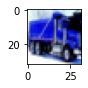

In [ ]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

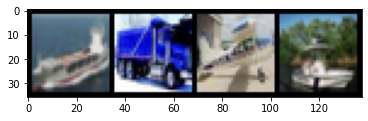

ship truck plane ship


In [ ]:
imshow(torchvision.utils.make_grid(images))  #only grid 4 
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [ ]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__() #inherit parent class
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2)) 
        #3-RGB , 16-o/p diff kernel,3-kernel size 3*3
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [ ]:
net = FirstCNN()

In [ ]:
out = net(images) #call forward function
out.shape #4-bathsize,16-output kernel,o/p-16*16 |  no more RGB image

torch.Size([4, 16, 16, 16])

In [ ]:
for param in net.parameters():
    print(param.shape)  #16-o/p kernel,3-RGB(channel depth),3*3 kernel , 16 - bias

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [ ]:
out1 = out[0, 0, :, :].detach().numpy()  
#0-0th batch,0-0th kernel/image,all row,all col ,detach - change to numpy array
print(out1.shape)

(16, 16)


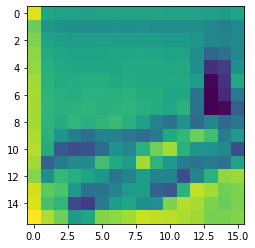

In [ ]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network

In [ ]:
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)  # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

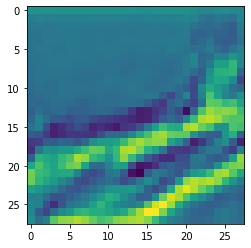

In [ ]:
plt.imshow(out[0, 0, :, :].detach().numpy())
#0-0th batch,0-0th kernel/image,all row,all col ,detach - change to numpy array

In [ ]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

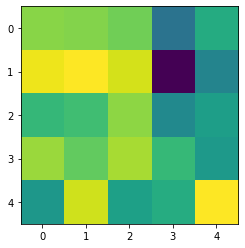

In [ ]:
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

In [ ]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28) N - batch
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        #flattening 
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120) 400parameters connected to 120 - neuron with bias
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84) 120 neurons to 84
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10) 84 to 10
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1) #flattening of the tensor , colapsed into 1 index
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x                 #no softmax function here , maximum value is o/p

In [ ]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [ ]:
print(out)

tensor([[-0.0721, -0.0796,  0.0757, -0.0481, -0.1224,  0.0171, -0.0897, -0.0493,
          0.1229,  0.0926],
        [-0.0870, -0.0795,  0.0755, -0.0251, -0.1178,  0.0199, -0.0944, -0.0406,
          0.1343,  0.0898],
        [-0.0853, -0.0846,  0.0806, -0.0395, -0.1191,  0.0300, -0.0908, -0.0483,
          0.1442,  0.1121],
        [-0.0867, -0.0746,  0.0868, -0.0241, -0.1436,  0.0364, -0.0811, -0.0313,
          0.1200,  0.0883]], grad_fn=<AddmmBackward>)


In [ ]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([8, 8, 8, 8])


## Training LeNet

In [ ]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [ ]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
net = LeNet()

In [ ]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 38.69, Train acc: 39.23
Epoch: 1/16, Test acc: 41.36, Train acc: 42.04
Epoch: 2/16, Test acc: 45.29, Train acc: 45.54
Epoch: 3/16, Test acc: 48.05, Train acc: 49.38
Epoch: 4/16, Test acc: 49.52, Train acc: 51.34
Epoch: 5/16, Test acc: 51.40, Train acc: 53.66
Epoch: 6/16, Test acc: 52.96, Train acc: 56.08
Epoch: 7/16, Test acc: 53.53, Train acc: 57.51
Epoch: 8/16, Test acc: 54.12, Train acc: 58.58
Epoch: 9/16, Test acc: 54.73, Train acc: 59.58
Epoch: 10/16, Test acc: 54.65, Train acc: 60.56
Epoch: 11/16, Test acc: 55.09, Train acc: 61.76
Epoch: 12/16, Test acc: 54.36, Train acc: 61.86
Epoch: 13/16, Test acc: 55.18, Train acc: 63.35
Epoch: 14/16, Test acc: 55.09, Train acc: 63.87
Epoch: 15/16, Test acc: 55.69, Train acc: 65.10


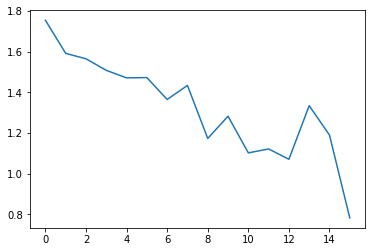

CPU times: user 8min 41s, sys: 6.79 s, total: 8min 48s
Wall time: 8min 49s


In [ ]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 2min 6s, sys: 1.01 s, total: 2min 7s
Wall time: 2min 7s


In [ ]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 55.95, Train acc: 64.96


## Basic Visualisation

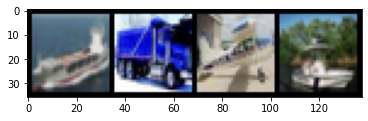

In [ ]:
imshow(torchvision.utils.make_grid(images))

In [ ]:
net = net.to('cpu')

In [ ]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [ ]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

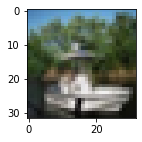

In [ ]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


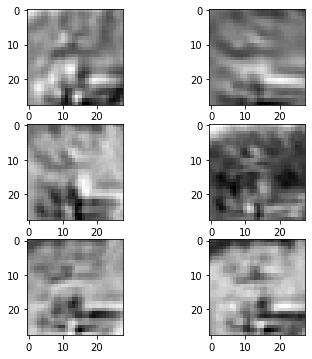

In [ ]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

## Exercises

* Modify LeNet to work with ReLU instead of Tanh -> What is the impact on training time, final loss
* We have observed over-fitting -> Use weight_decay in torch.optim to add L2 regularisation
* Instead of CIFAR10, use the MNIST data available from `torchvision.datasets.MNIST`. Download and visualise MNIST data.
* But importantly MNIST images have only 1 channel instead of 3 channels in the case of CIFAR10. Modify LeNet to work with MNIST. Train and find optimised test accuracy.